# Seasonal Autoregressive Integrated Moving Averages(SARIMA)

The big difference between an ARIMA model and a SARIMA model is the addition of seasonal error components to the model. Remember that the purpose of an ARIMA model is to make the time-series that you are working with act like a stationary series. This is important because if it isn’t stationary, you can get biased estimates of the coefficients.

The SARIMA model builds upon the ARIMA model. It includes the p, q, and d parameters, but also an extra set of parameters to account for time series seasonality. This parameter set– P, Q, D, and additional parameter m–is defined as follows:

- m : The seasonality of the model. For example, if the seasonality of time series is yearly, then m =12 
- P : The order of the seasonal autoregressive model.
- Q : The order of the seasonal moving average model.
- D : The number of seasonal differences applied to the time series.

<strong>NOTE:</strong> The statsmodels implementation of SARIMA is called SARIMAX. The “X” added to the name means that the function also supports <em>exogenous</em> regressor variables



In [1]:
#library imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pmdarima
%matplotlib inline


# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

#dataset import

df = pd.read_csv('co2_mm_mlo.csv') #we will need to restructure the data for statsmodels
df.head()


,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [2]:
# Add a "date" datetime column
df['date'] = pd.to_datetime({'year':df['year'],'month':df['month'],'day':1})

#set date as index"
df.set_index('date',inplace = True)
df.index.freq = 'MS'
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


### Plot the source data


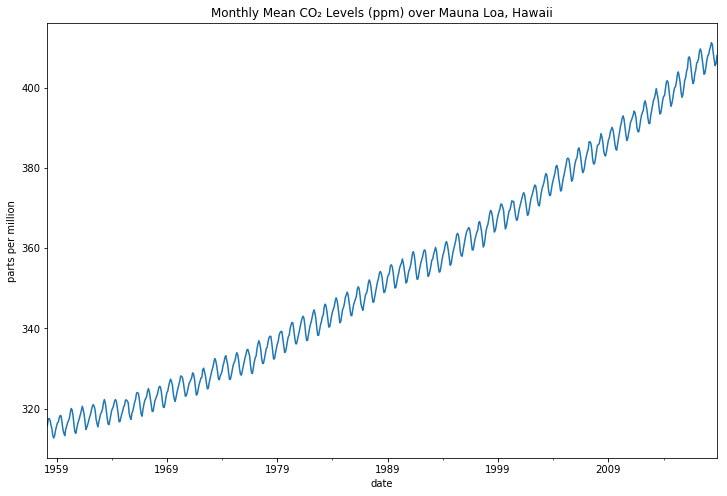

In [3]:
ax = df['interpolated'].plot(figsize=(12,8),title='Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii')
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='parts per million');

### Run ETS Decompostion

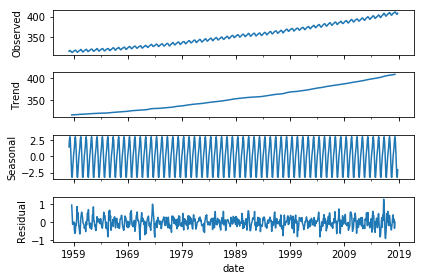

In [4]:
result = sm.tsa.seasonal_decompose(df['interpolated'],model = 'add')
result.plot();

### Run pmdarima.auto_arima

In [5]:
pmdarima.auto_arima(df['interpolated'],seasonal=True,m = 12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(0, 1, 3)x(1, 0, 1, 12)   Log Likelihood                -203.092
Date:                            Sat, 03 Oct 2020   AIC                            420.183
Time:                                    09:42:06   BIC                            452.315
Sample:                                         0   HQIC                           432.582
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0009      0.001      1.449      0.147      -0.000       0.002
ma.L1         -0.3577      0.037     -9.728      0.000      -0.430      -0.286
ma.L2         -0.0310      0.038     -0.813      0.416      -0.106       0.044
ma.L3         -0.0865      0.037     -2.349      0.019      -0.159      -0.014
ar.S.L12       0.9994      0.000   2999.488      0.000       0.999       1.000
ma.S.L12      -0.8695      0.021    -42.160      0.000      -0.910      -0.829
sigma2         0.0958      0.005     20.352      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       45.20   Jarque-Bera (JB):                 4.09
Prob(Q):                              0.26   Prob(JB):                         0.13
Heteroskedasticity (H):               1.11   Skew:                             0.01
Prob(H) (two-sided):                  0.40   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
# split the data into train and test
len(df)

729

In [7]:
# Set one year for testing
train = df.iloc[:717]
test = df.iloc[717:]

In [8]:
model = sm.tsa.SARIMAX(train['interpolated'],order=(4,1,0),seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(4, 1, 0)x(1, 0, 1, 12)   Log Likelihood                -201.034
Date:                            Sat, 03 Oct 2020   AIC                            416.067
Time:                                    09:42:30   BIC                            448.083
Sample:                                03-01-1958   HQIC                           428.430
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3502      0.035    -10.037      0.000      -0.419      -0.282
ar.L2         -0.1477      0.034     -4.342      0.000      -0.214      -0.081
ar.L3         -0.1374      0.036     -3.866      0.000      -0.207      -0.068
ar.L4         -0.0988      0.038     -2.598      0.009      -0.173      -0.024
ar.S.L12       0.9997      0.000   3278.358      0.000       0.999       1.000
ma.S.L12      -0.8656      0.023    -38.220      0.000      -0.910      -0.821
sigma2         0.0949      0.005     20.248      0.000       0.086       0.104
===================================================================================
Ljung-Box (Q):                       45.34   Jarque-Bera (JB):                 3.86
Prob(Q):                              0.26   Prob(JB):                         0.14
Heteroskedasticity (H):               1.14   Skew:                             0.02
Prob(H) (two-sided):                  0.30   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
# Obtain predicted values

start = len(train)
end = len(train) + len(test) -1

predictions = results.predict(start,end,dynamic=False, typ='levels').rename('SARIMA(4,1,0)X(1,0,1,12)')

Passing `dynamic=False` means that forecasts at each point are generated using the full history up to that point (all lagged values).

Passing `typ='levels'` predicts the levels of the original endogenous variables. If we'd used the default `typ='linear'` we would have seen linear predictions in terms of the differenced endogenous variables.

For more information on these arguments visit https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.predict.html

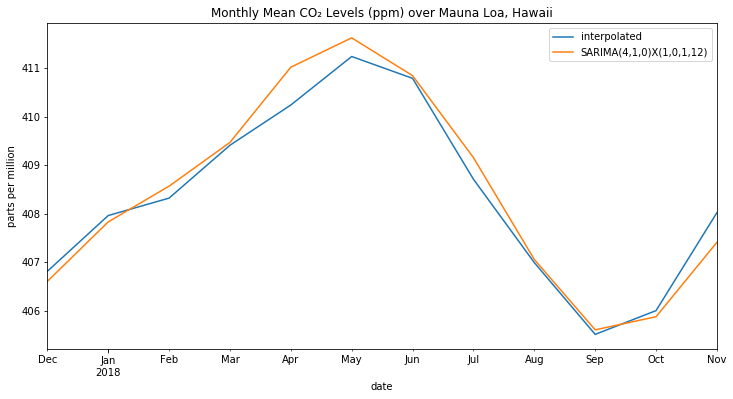

In [10]:
# Plot the predictions

ax = test['interpolated'].plot(legend=True,figsize=(12,6),title='Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii')
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='parts per million');


### Evaluate the Model

In [11]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['interpolated'],predictions)
print(f'SARIMA(4,1,0)(1,0,1,12) RMSE Error: {error:11.10}',error)

SARIMA(4,1,0)(1,0,1,12) RMSE Error: 0.123632631 0.12363263104269014


In [12]:
def bias(actuals, forecast):
  return np.mean((actuals-forecast) / actuals)*100

def wmape(actuals, forecast):
  mapes = abs(actuals-forecast) / actuals
  return np.sum(mapes * actuals) * 100 / np.sum(actuals)

In [13]:
wampe_d =wmape(test['interpolated'],predictions)
bias_d = bias(test['interpolated'],predictions)

print(f'WMAPE:{wampe_d:0.2f}')

print(f'WMAPE:{bias_d:.2f}') # good results

WMAPE:0.07
WMAPE:-0.02


### Make Final Forecast

In [4]:
model = sm.tsa.SARIMAX(df['interpolated'],order=(3,1,0),seasonal_order=(1,0,1,12))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  729
Model:             SARIMAX(3, 1, 0)x(1, 0, 1, 12)   Log Likelihood                -209.236
Date:                            Sat, 03 Oct 2020   AIC                            430.472
Time:                                    09:50:05   BIC                            458.013
Sample:                                         0   HQIC                           441.099
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3407      0.036     -9.531      0.000      -0.411      -0.271
ar.L2         -0.1329      0.038     -3.467      0.001      -0.208      -0.058
ar.L3         -0.0967      0.036     -2.657      0.008      -0.168      -0.025
ar.S.L12       0.9997      0.000   3256.945      0.000       0.999       1.000
ma.S.L12      -0.8677      0.021    -40.711      0.000      -0.909      -0.826
sigma2         0.0963      0.005     20.186      0.000       0.087       0.106
===================================================================================
Ljung-Box (Q):                       52.52   Jarque-Bera (JB):                 3.03
Prob(Q):                              0.09   Prob(JB):                         0.22
Heteroskedasticity (H):               1.14   Skew:                            -0.02
Prob(H) (two-sided):                  0.32   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
fcast = result.predict(len(df),len(df)+11,dynamic = True,typ = 'levels').rename('SARIMA(0,1,3)(1,0,1,12) Forecast')

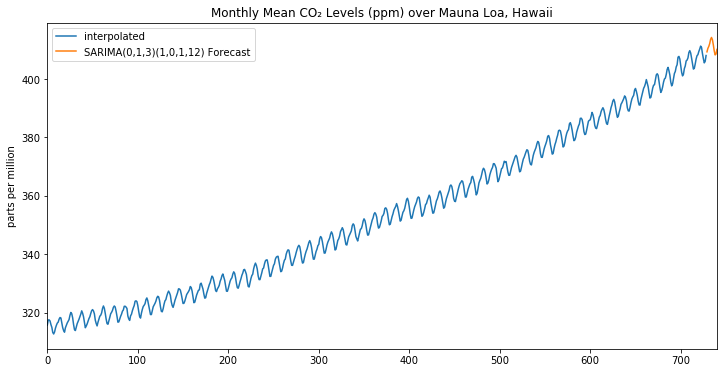

In [7]:
#Plot

# Plot the predictions

ax = df['interpolated'].plot(legend=True,figsize=(12,6),title='Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii')
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='parts per million');

# SARIMAX
### Seasonal Autoregressive Integrated Moving Averages with eXogenous regressors(SARIMAX)

The Seasonal AutoRegressive Integrated Moving Averages with eXogenous regressors(SARIMAX) method improves the traditional time-series methods by explicitly dealing with seasonality in the data and also accounting for external variables.

In [8]:
#load new dataset
df1 = pd.read_csv('RestaurantVisitors.csv',index_col=0,parse_dates=True)
df1.index.freq = 'D'
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


The data considers daily visitors to four restaurants located in the United States, subject to American holidays. For the exogenous variable we'll see how holidays affect patronage. The dataset contains 478 days of restaurant data, plus an additional 39 days of holiday data for forecasting purposes.

In [9]:
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [10]:
#dropping NA values
df1.dropna(inplace=True)
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [11]:
df1.dtypes

weekday          object
holiday           int64
holiday_name     object
rest1           float64
rest2           float64
rest3           float64
rest4           float64
total           float64
dtype: object

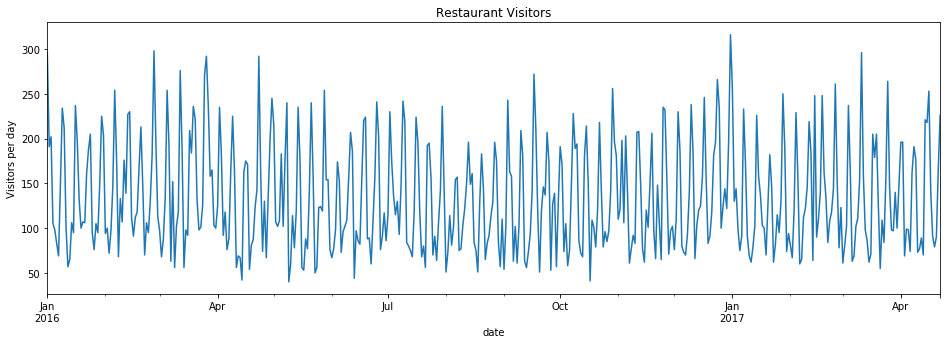

In [12]:
#Plot

ax = df1['total'].plot(figsize=(16,5),title='Restaurant Visitors')
ax.autoscale(axis='x',tight=True)
ax.set( ylabel='Visitors per day');

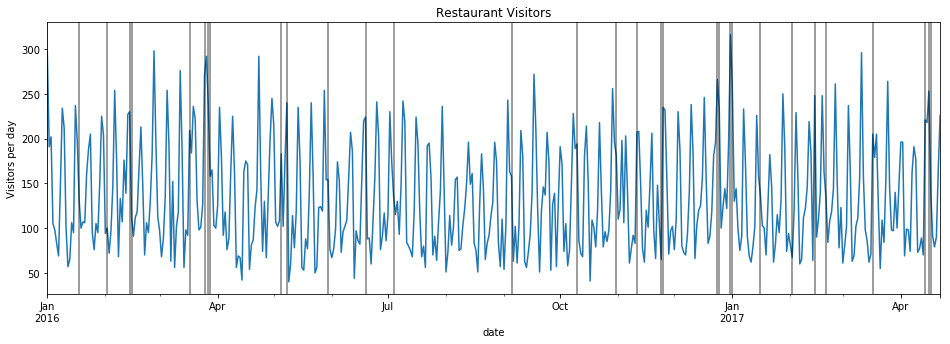

In [13]:
#Plot with holidays

ax = df1['total'].plot(figsize=(16,5),title='Restaurant Visitors')
ax.autoscale(axis='x',tight=True)
ax.set( ylabel='Visitors per day');

for x in df1[df1['holiday']==1].index:
    ax.axvline(x=x,color='k',alpha = 0.5)


In [14]:
# function for ADF test of stationarity

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = sm.tsa.stattools.adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")


In [15]:
adf_test(df1['total'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -5.592497
p-value                   0.000001
# lags used              18.000000
# observations          459.000000
critical value (1%)      -3.444677
critical value (5%)      -2.867857
critical value (10%)     -2.570135
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [16]:
# Run pmd.auto_arima

pmdarima.auto_arima(df1['total'],seasonal=True,m = 7,start_p=0,start_P=0,start_q=0,start_Q=0,maxiter=1000).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2417.721
Date:                           Sat, 03 Oct 2020   AIC                           4845.442
Time:                                   09:50:45   BIC                           4866.290
Sample:                                        0   HQIC                          4853.638
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.5662      4.363      4.714      0.000      12.015      29.118
ar.L1          0.1897      0.045      4.221      0.000       0.102       0.278
ar.S.L7        0.4258      0.037     11.606      0.000       0.354       0.498
ar.S.L14       0.3873      0.036     10.734      0.000       0.317       0.458
sigma2      1427.3967     86.679     16.468      0.000    1257.510    1597.283
===================================================================================
Ljung-Box (Q):                       77.20   Jarque-Bera (JB):                27.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.47
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
#split into test/train
len(df1)

478

In [18]:
train = df1.iloc[:436]
test = df1.iloc[436:]

#### Fit a SARIMA(1,0,0)(2,0,0,7) Model

In [19]:
model = sm.tsa.SARIMAX(train['total'],order = (1,0,0),seasonal_order=(2,0,0,7),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Sat, 03 Oct 2020   AIC                           4457.403
Time:                                   09:50:54   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (Q):                       83.96   Jarque-Bera (JB):                29.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
# obtain predicted values

start = len(train)
end = len(test) + len(train)-1

predictions = results.predict(start,end,dynamic = True,typ = 'levels').rename('SARIMA')

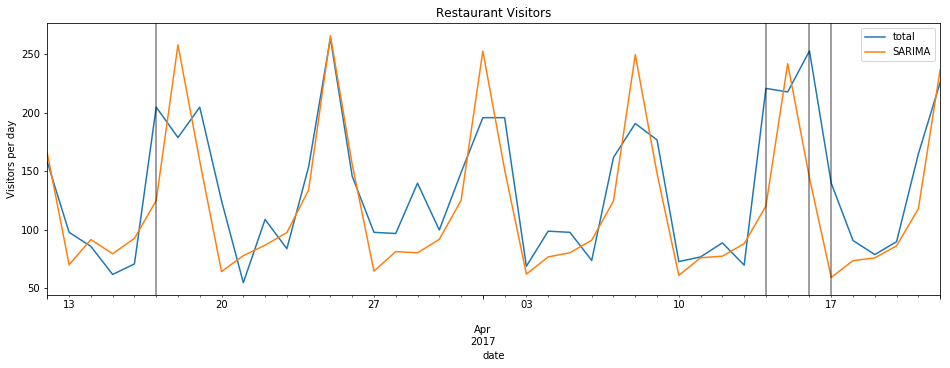

In [21]:
ax = test['total'].plot(figsize=(16,5),title='Restaurant Visitors',legend= True)
predictions.plot(legend = True)
ax.autoscale(axis='x',tight=True)
ax.set( ylabel='Visitors per day');

for x in test[df1['holiday']==1].index:
    ax.axvline(x=x,color='k',alpha = 0.5)


### Evaluate the Model

In [22]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['total'],predictions)
print(f'SARIMA(1,0,0)(2,0,0,7) RMSE Error: {error:11.10}')

SARIMA(1,0,0)(2,0,0,7) RMSE Error: 1702.647958


In [23]:
def bias(actuals, forecast):
  return np.mean((actuals-forecast) / actuals)*100

def wmape(actuals, forecast):
  mapes = abs(actuals-forecast) / actuals
  return np.sum(mapes * actuals) * 100 / np.sum(actuals)

In [24]:
wampe_d =wmape(test['total'],predictions)
bias_d = bias(test['total'],predictions)

print(f'WMAPE:{wampe_d:0.2f}')

print(f'Bias:{bias_d:.2f}') # good results

WMAPE:23.12
Bias:7.69


### Adding exogenous variable



In [25]:
model = sm.tsa.SARIMAX(train['total'],exog=train['holiday'],order=(1,0,0),seasonal_order=(2,0,0,7),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2158.482
Date:                           Sat, 03 Oct 2020   AIC                           4326.963
Time:                                   09:50:59   BIC                           4347.352
Sample:                               01-01-2016   HQIC                          4335.010
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       66.8897      4.241     15.774      0.000      58.578      75.201
ar.L1          0.2145      0.049      4.375      0.000       0.118       0.311
ar.S.L7        0.5147      0.042     12.312      0.000       0.433       0.597
ar.S.L14       0.4575      0.042     10.997      0.000       0.376       0.539
sigma2      1117.3977     73.302     15.244      0.000     973.729    1261.066
===================================================================================
Ljung-Box (Q):                      100.96   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               0.91   Skew:                             0.11
Prob(H) (two-sided):                  0.58   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
start = len(train)
end = len(test)+len(train)-1
predictions = results.predict(start,end,exog =test[['holiday']]).rename('SARIMAX(1,0,0)(2,0,0,7) Predictions')

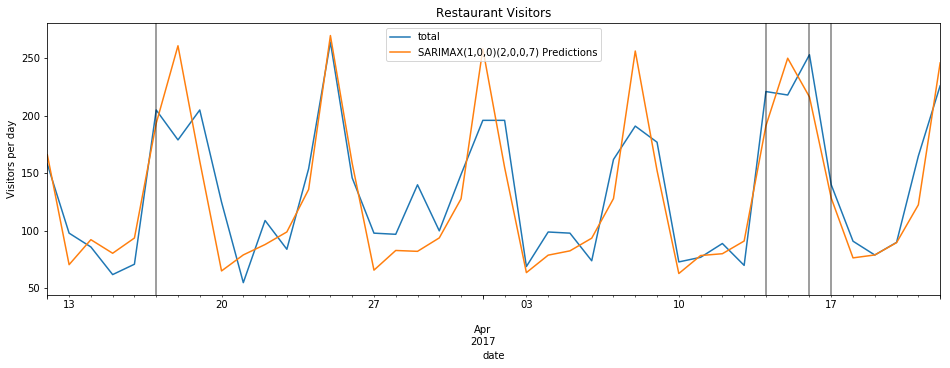

In [27]:
ax = test['total'].plot(figsize=(16,5),title='Restaurant Visitors',legend= True)
predictions.plot(legend = True)
ax.autoscale(axis='x',tight=True)
ax.set( ylabel='Visitors per day');

for x in test[test['holiday']==1].index:
    ax.axvline(x=x,color='k',alpha = 0.5) # can see the effect of exog variable


### Evaluate the Model

In [28]:
wampe_d =wmape(test['total'],predictions)
bias_d = bias(test['total'],predictions)

print(f'WMAPE:{wampe_d:0.2f}')

print(f'Bias:{bias_d:.2f}') # better results

WMAPE:18.16
Bias:2.46


# Vector Autoregression

## VAR(p)

### Theory

One limitation of the models that we have considered so far is that they impose a unidirectional relationship — the forecast variable is influenced by the predictor variables, but not vice versa. In our previous SARIMAX example, the forecast variable $y_t$ was influenced by the exogenous predictor variable, but not vice versa. That is, the occurrence of a holiday affected restaurant patronage but not the other way around.

An example of such a situation occurred in Australia during the Global Financial Crisis of 2008–2009. The Australian government issued stimulus packages that included cash payments in December 2008, just in time for Christmas spending. As a result, retailers reported strong sales and the economy was stimulated. Consequently, incomes increased.

### Formulation

The vector autoregression (VAR) model extends the idea of univariate autoregression to $K$ time series regressions, where the lagged values of all $K$ series appear as regressors. Put differently, in a VAR model we regress a vector of time series variables on lagged vectors of these variables. 


A $K$-dimensional VAR model of order $p$, denoted <strong>VAR(p)</strong>, considers each variable $y_K$ in the system.<br>

For example, The system of equations for a 2-dimensional VAR(1) model is:

<center>$y_{1,t} = c_1 + \phi_{11,1} * y_{1,t-1} + \phi_{12,1} * y_{2,t-1} + \varepsilon_{1,t}$</center> <br>
<center>$y_{2,t} = c_2 + \phi_{21,1} * y_{1,t-1} + \phi_{22,1} * y_{2,t-1} + \varepsilon_{2,t}$</center> <br>


where the coefficient $\phi_{ii,l}$ captures the influence of the $l$th lag of variable $y_i$ on itself,<br><br>
the coefficient $\phi_{ij,l}$ captures the influence of the $l$th lag of variable $y_j$ on $y_i$,<br><br>
and $\varepsilon_{1,t}$ and $\varepsilon_{2,t}$ are white noise processes that may be correlated.<br><br>


### Perform data imports

For this example, we will compare money to spending. We will look at FED data on Money Stock and US personal spending. 

The data can be found [here](https://fred.stlouisfed.org/series/PCE). I am going to ignore the pandemic data and restrict our data to 2015.

In [29]:
import pandas as pd
import numpy as np
%matplotlib inline
import statsmodels.api as sm

df = pd.read_csv('M2SLMoneyStock.csv',index_col=0,parse_dates=True)
df.index.freq = 'MS'

sp = pd.read_csv('PCEPersonalSpending.csv',index_col=0,parse_dates=True)
sp.index.freq = 'MS'


In [30]:
df = df.merge(sp,how = 'inner',left_index=True,right_index=True).dropna()
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


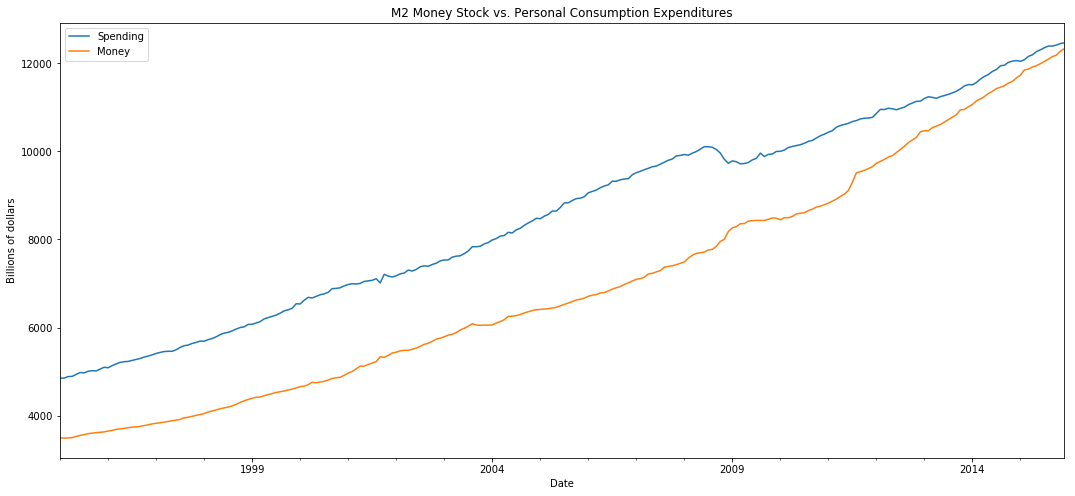

In [31]:
#Plot
title = 'M2 Money Stock vs. Personal Consumption Expenditures'
ylabel='Billions of dollars'

ax = df['Spending'].plot(figsize=(18,8),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set( ylabel=ylabel)
df['Money'].plot(legend=True);

#### Check for stationarity

In [32]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = sm.tsa.adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [33]:
adf_test(df['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic        4.239022
p-value                   1.000000
# lags used               4.000000
# observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [34]:
adf_test(df['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.149796
p-value                   0.969301
# lags used               3.000000
# observations          248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


Neither variable is stationary, so we will take the first order difference and re-run the ADF test.

In [35]:
df_transformed = df.diff().dropna()

In [36]:
adf_test(df_transformed['Money'])# Not Stationary yet

Augmented Dickey-Fuller Test: 
ADF test statistic       -2.057404
p-value                   0.261984
# lags used              15.000000
# observations          235.000000
critical value (1%)      -3.458487
critical value (5%)      -2.873919
critical value (10%)     -2.573367
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [37]:
adf_test(df_transformed['Spending']) 

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.226974e+00
p-value                 2.041027e-10
# lags used             2.000000e+00
# observations          2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [38]:
df_transformed = df_transformed.diff().dropna()
adf_test(df_transformed['Money'],title = 'Money Stocks') 
print()
adf_test(df_transformed['Spending'], title='SpendingSecondDiff')

Augmented Dickey-Fuller Test: Money Stocks
ADF test statistic     -7.077471e+00
p-value                 4.760675e-10
# lags used             1.400000e+01
# observations          2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: SpendingSecondDiff
ADF test statistic     -8.760145e+00
p-value                 2.687900e-14
# lags used             8.000000e+00
# observations          2.410000e+02
critical value (1%)    -3.457779e+00
critical value (5%)    -2.873609e+00
critical value (10%)   -2.573202e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [39]:
df_transformed.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [40]:
len(df_transformed)

250

## Test/Train Split

In [41]:
nobs = 12
train,test = df_transformed[:-nobs],df_transformed[-nobs:]

In [42]:
print(train.shape)
print(test.shape)

(238, 2)
(12, 2)


## Var Order Grid Search

In [43]:
for i in [1,2,3,4,5,6,7]:
    model = sm.tsa.VAR(train)
    result = model.fit(i)
    
    print(f'Order: {i}')
    print(f'AIC: {result.aic}')
    print(f'BIC: {result.bic} \n')
    
    


Order: 1
AIC: 14.178610495220896
BIC: 14.266409486135709 

Order: 2
AIC: 13.955189367163705
BIC: 14.101961901274958 

Order: 3
AIC: 13.849518291541038
BIC: 14.055621258341116 

Order: 4
AIC: 13.827950574458281
BIC: 14.093744506408875 

Order: 5
AIC: 13.78730034460964
BIC: 14.113149468980652 

Order: 6
AIC: 13.799076756885807
BIC: 14.185349048538066 

Order: 7
AIC: 13.797638727913972
BIC: 14.244705963046671 



The VAR(5) model seems to return the lowest combined scores.<br>


### Fir VAR(5) Model

In [44]:
model = sm.tsa.VAR(train)
results = model.fit(5,ic = 'aic')

In [45]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 03, Oct, 2020
Time:                     09:51:18
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

In [46]:
# Predict
z = results.forecast(train[-results.k_ar:].values,steps = 12)

In [47]:
z

array([[-16.99527634,  36.14982003],
       [ -3.17403756, -11.45029844],
       [ -0.377725  ,  -6.68496939],
       [ -2.60223305,   5.47945777],
       [  4.228557  ,  -2.44336505],
       [  1.55939341,   0.38763902],
       [ -0.99841027,   3.88368011],
       [  0.36451042,  -2.3561014 ],
       [ -1.21062726,  -1.22414652],
       [  0.22587712,   0.786927  ],
       [  1.33893884,   0.18097449],
       [ -0.21858453,   0.21275046]])

In [48]:
test

,Money,Spending
Date,,
2015-01-01,-15.5,-26.6
2015-02-01,56.1,52.4
2015-03-01,-102.8,39.5
2015-04-01,30.9,-40.4
2015-05-01,-15.8,38.8
2015-06-01,14.0,-34.1
2015-07-01,6.7,6.9
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8


In [49]:
idx = pd.date_range('2015-01-01',periods=12,freq = 'MS')
df_forecast = pd.DataFrame(data = z,index=idx,columns=['Money2d','Spending2d'])
df_forecast.head()

,Money2d,Spending2d
2015-01-01,-16.995276,36.149820
2015-02-01,-3.174038,-11.450298
2015-03-01,-0.377725,-6.684969
2015-04-01,-2.602233,5.479458
2015-05-01,4.228557,-2.443365


The forecast represented in second order differences. To get the actual forecast value, we need to roll back each difference.

In [50]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money1d'].cumsum()

In [51]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending1d'].cumsum()

In [52]:
df_forecast

,Money2d,Spending2d,Money1d,MoneyForecast,Spending1d,SpendingForecast
2015-01-01,-16.995276,36.149820,61.604724,11731.704724,46.749820,12108.749820
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410,35.299522,12144.049342
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371,28.614552,12172.663894
2015-04-01,-2.602233,5.479458,55.450728,11903.639099,34.094010,12206.757904
2015-05-01,4.228557,-2.443365,59.679285,11963.318384,31.650645,12238.408549
2015-06-01,1.559393,0.387639,61.238678,12024.557062,32.038284,12270.446833
2015-07-01,-0.998410,3.883680,60.240268,12084.797331,35.921964,12306.368797
2015-08-01,0.364510,-2.356101,60.604779,12145.402109,33.565863,12339.934659
2015-09-01,-1.210627,-1.224147,59.394151,12204.796261,32.341716,12372.276375
2015-10-01,0.225877,0.786927,59.620028,12264.416289,33.128643,12405.405019


## Plot the Results

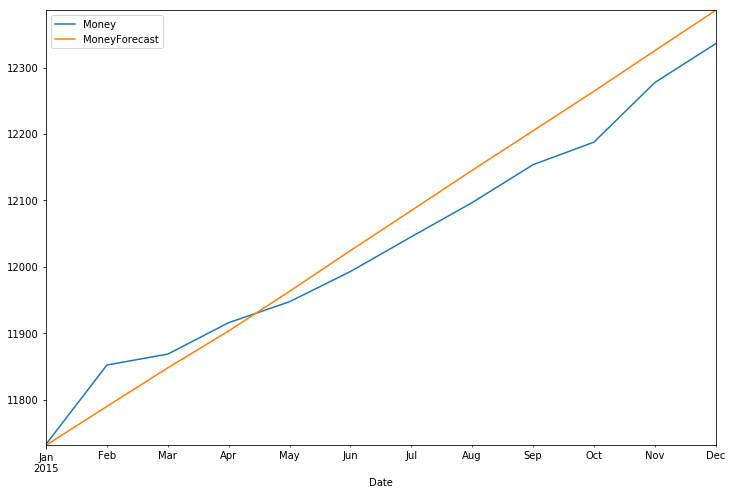

In [53]:
df['Money'][-nobs:].plot(figsize = (12,8),legend = True).autoscale(axis = 'both',tight = True)
df_forecast['MoneyForecast'].plot(figsize = (12,8),legend =True)

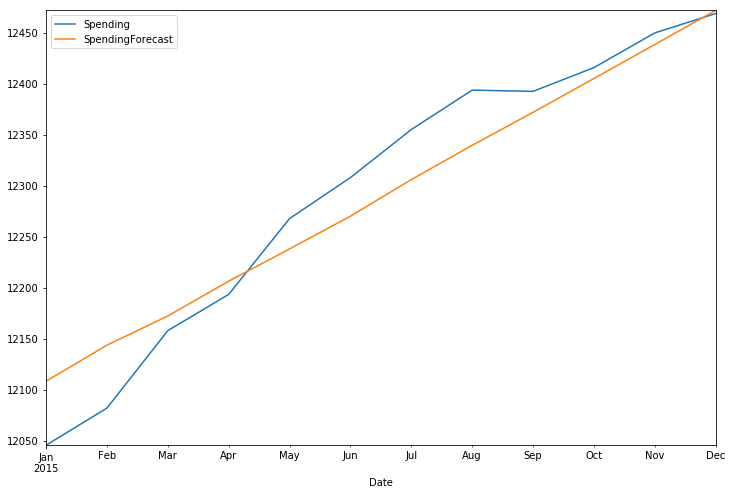

In [54]:
df['Spending'][-nobs:].plot(figsize = (12,8),legend = True).autoscale(axis = 'both',tight = True)
df_forecast['SpendingForecast'].plot(figsize = (12,8),legend =True)

### Evaluate Model Performance

In [55]:
def bias(actuals, forecast):
  return np.mean((actuals-forecast) / actuals)*100

def wmape(actuals, forecast):
  mapes = abs(actuals-forecast) / actuals
  return np.sum(mapes * actuals) * 100 / np.sum(actuals)

In [56]:
# Money Stock

bias_m = bias(df_forecast['MoneyForecast'],df['Money'][-nobs:])
wmape_m = wmape(df_forecast['MoneyForecast'],df['Money'][-nobs:])

print(f'bias for money stock: {bias_m} \n')

print(f'wmape for money stock: {wmape_m}')

bias for money stock: 0.17820961290065238 

wmape for money stock: 0.31658463016865906


In [57]:
#CPI
bias_m = bias(df_forecast['SpendingForecast'],df['Spending'][-nobs:])
wmape_m = wmape(df_forecast['SpendingForecast'],df['Spending'][-nobs:])

print(f'bias for money CPI: {bias_m} \n')

print(f'wmape for money CPI: {wmape_m}')

bias for money CPI: -0.038008801762899676 

wmape for money CPI: 0.24960201244806707


VAR model usually performs worse than AR models. We use VAR to develop relation between multiple time series in algorithmic trading, econometric data etc. 

# Vector Autoregressive Moving Average

## VARMA(p,q)

VARMA(p,q) model is an extention of VAR(p) model with an added MA component. 

A $K$-dimensional VARMA model of order $(p,q)$ considers each variable $y_K$ in the system.<br>

For example, the system of equations for a 2-dimensional VARMA(1,1) model is: <br><br>

<center> $y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \theta_{11,1}\varepsilon_{1,t-1} +  \theta_{12,1}\varepsilon_{2,t-1} + \varepsilon_{1,t}$ </center> <br>
<center> $y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \theta_{21,1}\varepsilon_{1,t-1} + \theta_{22,1}\varepsilon_{2,t-1} + \varepsilon_{2,t}$ </center> <br>

where the coefficient $\theta_{ii,l}$ captures the influence of the $l$th lag of error $\varepsilon_i$ on itself,<br>
the coefficient $\theta_{ij,l}$ captures the influence of the $l$th lag of error $\varepsilon_j$ on $\varepsilon_i$,<br>
and $\varepsilon_{1,t}$ and $\varepsilon_{2,t}$ are residual white noise.<br>


In [58]:
#Reloading the data

df = pd.read_csv('M2SLMoneyStock.csv',index_col=0,parse_dates=True)
df.index.freq = 'MS'

sp = pd.read_csv('PCEPersonalSpending.csv',index_col=0,parse_dates=True)
sp.index.freq = 'MS'


In [59]:
# Joining the data
df = df.merge(sp,how = 'inner',left_index=True,right_index=True).dropna()
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [62]:
# get the optimized order of (p,q) for VARMA(p,q)
pmdarima.auto_arima(df['Money'])

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 2, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=False, transparams=True, trend=None,
   with_intercept=True)

In [63]:
pmdarima.auto_arima(df['Spending'])

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=False, transparams=True, trend=None,
   with_intercept=True)

It looks like a VARMA(1,2) model is recommended. Note that the $d$ term (2 for Money, 1 for Spending) is about to be addressed by transforming the data to make it stationary. As before we'll apply a second order difference.

In [64]:
df_transformed = df.diff().diff()
df_transformed = df_transformed.dropna()
df_transformed.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [65]:
len(df_transformed)

250

In [66]:
# Test Train Split
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

print(train.shape)
print(test.shape)

(238, 2)
(12, 2)


## Fit the VARMA(1,2) Model

In [67]:
model = sm.tsa.VARMAX(train,order = (1,2),trend = 'c')
results = model.fit(maxiter=1000, disp=False)
results.summary()

Dep. Variable:,"['Money', 'Spending']",No. Observations:,238
Model:,"VARMA(1,2)",Log Likelihood,-2286.286
,+ intercept,AIC,4606.571
Date:,"Sat, 03 Oct 2020",BIC,4665.600
Time:,09:55:50,HQIC,4630.361
Sample:,03-01-1995,,
,- 12-01-2014,,
Covariance Type:,opg,,
Ljung-Box (Q):,"68.42, 28.14",Jarque-Bera (JB):,"547.62, 120.94"
Prob(Q):,"0.00, 0.92",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"5.61, 2.91",Skew:,"1.33, -0.34"


Unlike the VAR model we used in the previous section, the VARMAX <tt>.forecast()</tt> function won't require that we pass in a number of previous observations, and it will provide an extended DateTime index.



In [68]:
df_forecast = results.forecast(12)
df_forecast

,Money,Spending
2015-01-01,-11.501568,36.789494
2015-02-01,-10.883687,-4.696517
2015-03-01,1.124754,-0.222204
2015-04-01,-1.413346,-0.379833
2015-05-01,0.889492,0.180924
2015-06-01,-0.263555,-0.048266
2015-07-01,0.429407,0.101016
2015-08-01,0.038821,0.019025
2015-09-01,0.263797,0.066679
2015-10-01,0.135170,0.039517


In [69]:
# Inverse the Transformation

# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money'].cumsum()


In [70]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending'].cumsum()

In [71]:
df_forecast

,Money,Spending,Money1d,MoneyForecast,Spending1d,SpendingForecast
2015-01-01,-11.501568,36.789494,67.098432,11658.598432,47.389494,12098.789494
2015-02-01,-10.883687,-4.696517,56.214745,11647.714745,42.692977,12094.092977
2015-03-01,1.124754,-0.222204,57.339499,11648.839499,42.470773,12093.870773
2015-04-01,-1.413346,-0.379833,55.926154,11647.426154,42.090940,12093.490940
2015-05-01,0.889492,0.180924,56.815646,11648.315646,42.271865,12093.671865
2015-06-01,-0.263555,-0.048266,56.552091,11648.052091,42.223598,12093.623598
2015-07-01,0.429407,0.101016,56.981498,11648.481498,42.324614,12093.724614
2015-08-01,0.038821,0.019025,57.020319,11648.520319,42.343640,12093.743640
2015-09-01,0.263797,0.066679,57.284116,11648.784116,42.410319,12093.810319
2015-10-01,0.135170,0.039517,57.419286,11648.919286,42.449836,12093.849836


In [72]:
pd.concat([df.iloc[-12:],df_forecast[['MoneyForecast','SpendingForecast']]],axis=1)

,Money,Spending,MoneyForecast,SpendingForecast
Date,,,,
2015-01-01,11733.2,12046.0,11658.598432,12098.789494
2015-02-01,11852.4,12082.4,11647.714745,12094.092977
2015-03-01,11868.8,12158.3,11648.839499,12093.870773
2015-04-01,11916.1,12193.8,11647.426154,12093.490940
2015-05-01,11947.6,12268.1,11648.315646,12093.671865
2015-06-01,11993.1,12308.3,11648.052091,12093.623598
2015-07-01,12045.3,12355.4,11648.481498,12093.724614
2015-08-01,12096.8,12394.0,11648.520319,12093.743640
2015-09-01,12153.8,12392.8,11648.784116,12093.810319


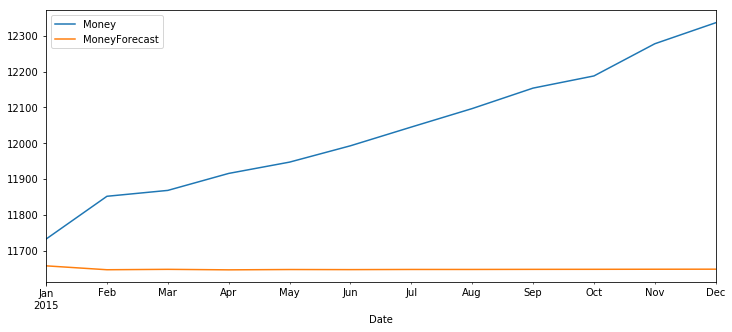

In [73]:
df['Money'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['MoneyForecast'].plot(legend=True);

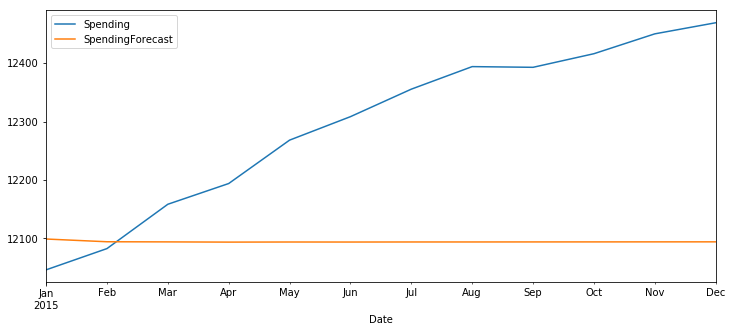

In [74]:
df['Spending'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['SpendingForecast'].plot(legend=True);

VARMA model does relatively poor job compared to simpler alternatives. This tells us that there is little or no interdepence between Money Stock and Personal Consumption Expenditures, at least for the timespan we investigated. This is helpful! By fitting a model and getting poor results we know more about the data than we did before.